# IMDB movies analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## The Questions:
 > 1- The most type of movies gain a profit
 >
 > 2- What is the movies that has the highest revenue,profit and budget
 >
 > 3- Clarify the highest and the lowest movie in the revenues
 >
 > 4- What is the year that has the highest profit
 >
 > 5- The highest and lowest runtime movies

In [1]:
# Import the needed laibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# load the data and check a header for this data to ensure that all the data loaded sucssefuly
df= pd.read_csv("/kaggle/input/tmdb-movies-dataset/tmdb-movies.csv")
pd.set_option('display.max_columns', None)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# check all the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# show the contionus data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# show the categorical data
df.describe(include="O")

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


### Data Cleaning (Here we will clean the data after we preview it)

In [6]:
# drop all the columns that we don't need
df=df.drop(columns=["id","imdb_id","homepage","tagline","keywords","overview","budget_adj","revenue_adj"])

In [7]:
# convert the column(release_date) into a date
df["release_date"]=pd.to_datetime(df["release_date"])

In [8]:
# filter the data by ignore the zero values for each of revenue and budget and runtime
df=df[(df["revenue"]>0) & (df["budget"]>0)  & (df["runtime"]>0)]
# Drop the duplicated values and any nan values
df=df.drop_duplicates()
df=df.dropna()

In [9]:
# make another columne named profit
df["Profit"]=df["revenue"]-df["budget"]

In [10]:
# Check the data after clearness
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3805 non-null   float64       
 1   budget                3805 non-null   int64         
 2   revenue               3805 non-null   int64         
 3   original_title        3805 non-null   object        
 4   cast                  3805 non-null   object        
 5   director              3805 non-null   object        
 6   runtime               3805 non-null   int64         
 7   genres                3805 non-null   object        
 8   production_companies  3805 non-null   object        
 9   release_date          3805 non-null   datetime64[ns]
 10  vote_count            3805 non-null   int64         
 11  vote_average          3805 non-null   float64       
 12  release_year          3805 non-null   int64         
 13  Profit           

* Sound good after the we cleaning the data we will go the next step is Exploratory of the data

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 (The most type of movies gain a profit)

In [11]:
# split the symbol "|" from the genres
df["genres"]=df["genres"].apply(lambda x: x.split("|")[0].strip())

In [12]:
# Check the sumation of the profit , revenue and budget for each genres by the highst profit
genres_BRP=df.groupby("genres").agg({
    "genres":["size"],
    "Profit":["sum"],
    "revenue":["sum"],
    "budget":["sum"]
}).sort_values(by=("Profit","sum"),ascending=False)
genres_BRP

,genres,Profit,revenue,budget
,size,sum,sum,sum
genres,,,,
Action,684,57942210089,93561849214,35619639125
Adventure,312,49126371241,71807991441,22681620200
Comedy,775,41386905819,61962780957,20575875138
Drama,876,35715444010,57586260528,21870816518
Animation,101,20189949886,28393149886,8203200000
Science Fiction,98,11864682292,17038789305,5174107013
Fantasy,109,11467626332,17550676343,6083050011
Horror,272,10929813014,15105563020,4175750006


* As we can see the most profit in action movies with total profit 57 Billion and total number 684 movie
* Then the Adventure movies with total amount 49 Billion and total number 312 movie
* The las one is Documentary and TV movies with totla profits 512 Million and 37 Million and total number 23 and 1

Text(0.5, 1.0, 'No. of movies')

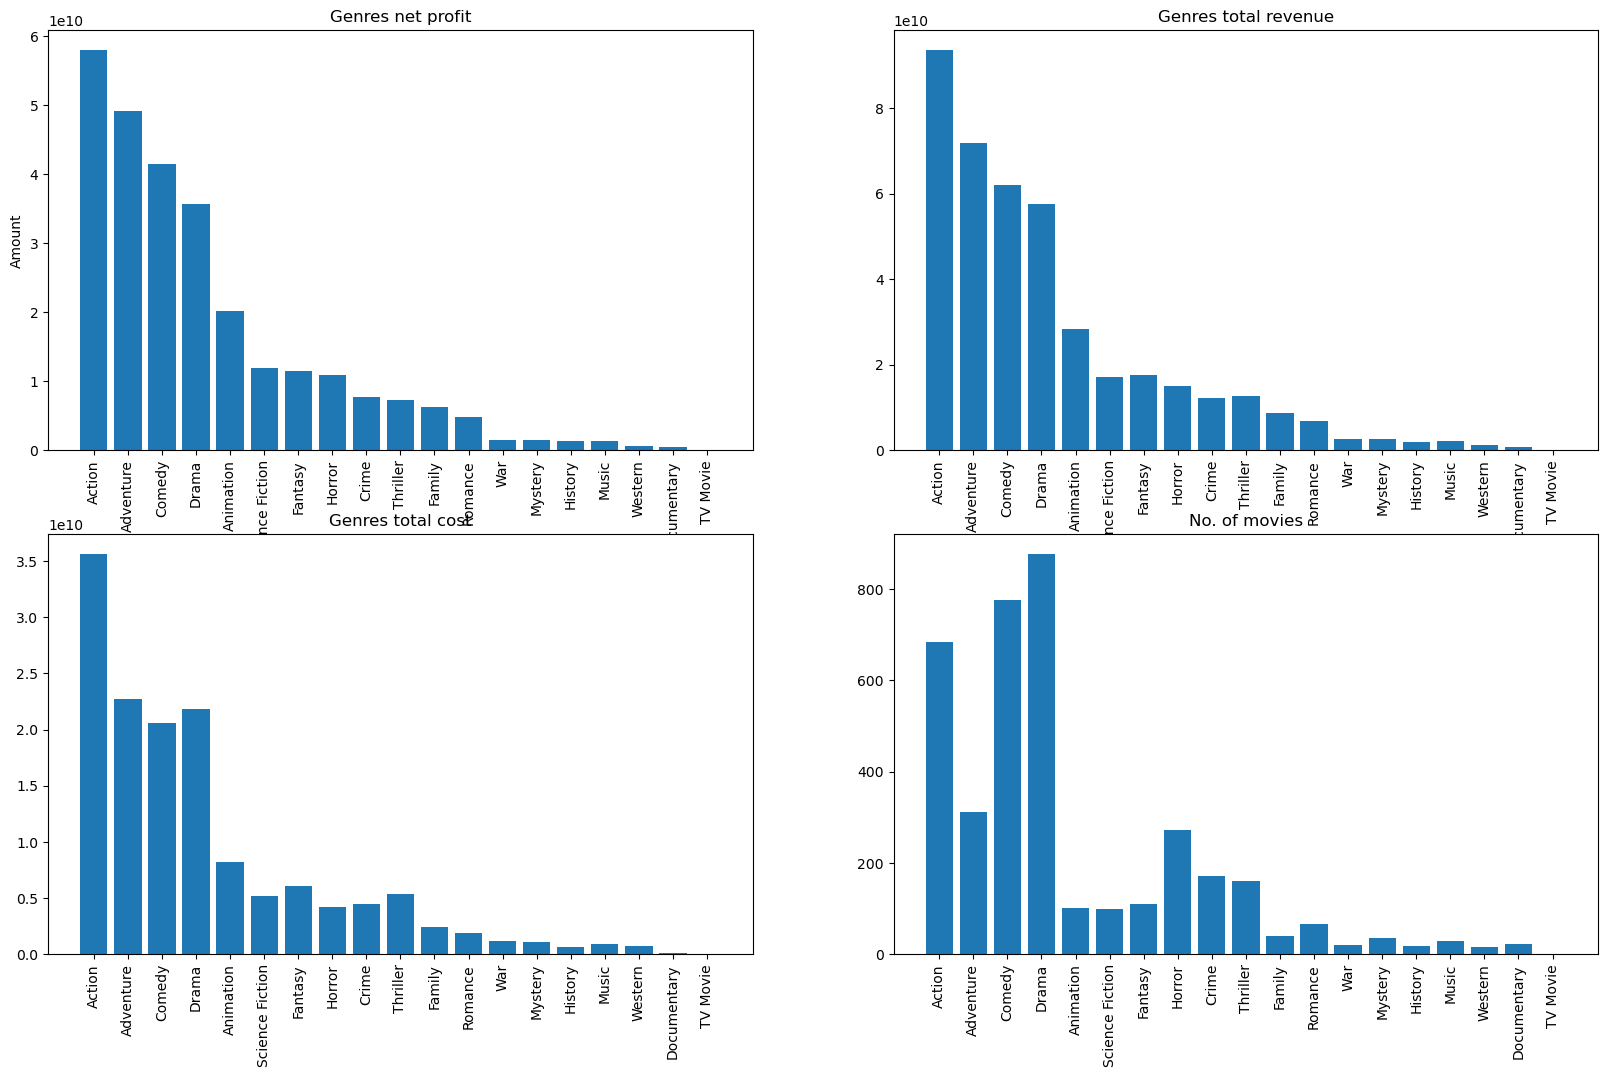

In [13]:
# Make a visulazation for the genres with revenue , profit and budget and the count of each one
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
x=genres_BRP["Profit"]["sum"].index
y=genres_BRP["Profit"]["sum"].values
ax[0,0].bar(list(x),list(y))
ax[0,0].tick_params(axis='x', labelrotation = 90)
ax[0,0].set_title("Genres net profit")
ax[0,0].set_ylabel("Amount")
fig.set_figheight(12) # figure height in inches


x=genres_BRP["revenue"]["sum"].index
y=genres_BRP["revenue"]["sum"].values
ax[0,1].bar(list(x),list(y))
ax[0,1].tick_params(axis='x', labelrotation = 90)
ax[0,1].set_title("Genres total revenue")
#fig.set_figheight(20) # figure height in inches

x=genres_BRP["budget"]["sum"].index
y=genres_BRP["budget"]["sum"].values
ax[1,0].bar(list(x),list(y))
ax[1,0].tick_params(axis='x', labelrotation = 90)
ax[1,0].set_title("Genres total cost")
#fig.set_figheight(20) # figure height in inches

x=genres_BRP["genres"]["size"].index
y=genres_BRP["genres"]["size"].values
ax[1,1].bar(list(x),list(y))
ax[1,1].tick_params(axis='x', labelrotation = 90)
ax[1,1].set_title("No. of movies")
#fig.set_figheight(20) # figure height in inches

* the action moives has the highest number of movies and the highest profits

### Question 2 (What is the movies that has the highest revenue,profit and budget)

In [14]:
# explort the most movies has a highest revenue,profit and budget
X=df[df["revenue"]==df["revenue"].max()][["revenue","budget","original_title","genres","release_year","Profit"]].append(
    df[df["Profit"]==df["Profit"].max()][["revenue","budget","original_title","genres","release_year","Profit"]].append(
    df[df["budget"]==df["budget"].max()][["revenue","budget","original_title","genres","release_year","Profit"]]
    ))
X

,revenue,budget,original_title,genres,release_year,Profit
1386,2781505847,237000000,Avatar,Action,2009,2544505847
1386,2781505847,237000000,Avatar,Action,2009,2544505847
2244,11087569,425000000,The Warrior's Way,Adventure,2010,-413912431


* The highest profit is Avatar
* The highest revenue is Avatar
* The highest budget is The Warrior's Way

### Question 3 (identify the highest and the lowest movie in the revenues )

In [15]:
# identify the highest and the lowest movie in the revenues 
max_rev=df.loc[df["revenue"].idxmax()]
min_rev=df.loc[df["revenue"].idxmin()]

concat_df=pd.concat([max_rev,min_rev],axis=1).rename(columns={df["revenue"].idxmax():"Highest revenue"}).rename(columns={df["revenue"].idxmin():"Lowest revenue"})
concat_df

,Highest revenue,Lowest revenue
popularity,9.432768,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action,Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


* The highest revenue goes to Avater
* The lowest revenue goes to Shattered Glass


### Question 4 (What is the year that has the highest profit)

In [16]:
# the year that has the highest profit
year_BRP=df.groupby("release_year").agg({
    "budget":["sum"],
    "revenue":["sum"],
    "Profit":["sum"]
})#.sort_values(("Profit","sum"),ascending=False)
year_BRP

,budget,revenue,Profit
,sum,sum,sum
release_year,,,
1960,20806948,129005000,108198052
1961,38637000,337720188,299083188
1962,39450000,206329846,166879846
1963,61115000,176526882,115411882
1964,33935161,328613548,294678387
1965,58800000,458081854,399281854
1966,32268000,84736689,52468689
1967,95500000,731834637,636334637


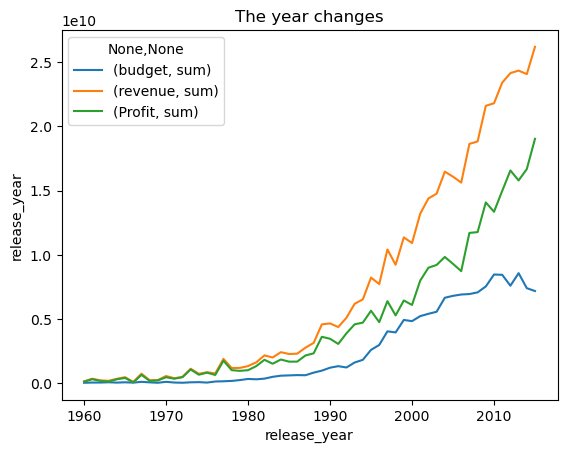

In [17]:
#Visualiz the years with the profit , revenue and budget
year_BRP.plot(ylabel="release_year",title="The year changes",legend=True);

* The total revenues is increasing from 1960 till 2015 as shown above

In [18]:
# identify the highest and the lowest movie in the revenues 
max_time=df.loc[df["runtime"].idxmax()]
min_time=df.loc[df["runtime"].idxmin()]

concat_df=pd.concat([max_time,min_time],axis=1).rename(columns={df["runtime"].idxmax():"Highest runtime"}).rename(columns={df["runtime"].idxmin():"Lowest runtime"})
concat_df

,Highest runtime,Lowest runtime
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime,Science Fiction
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


* As shown above the highest runtime movie is Carlos with 338 minutes and loswest one is Kid's Story with 15 minutes.

<a id='conclusions'></a>
## Limitaions 

* We have and issues in the data cleaning, there are many cells in the reveune and budget columns have a zero value so we have to remove it this data is around 50% of all the data.
* We cann't totally dependent on result on all the total amount for each type movie beacuse there are an outliers in the data.
* There are many type of movies have many records and others have a limit records.

## Conclusions
* As we see above we can say that the most profit is came from the Adventure movies beacuse we have only 312 movie around(8% of total movies) although it cames as 2nd type of movies has a profit and we can say that the Animation movies is achived around 20.19 Billion as a profits and it we have only 101 movies.